# XL STUDY CASE

## Data Preparation

In [ ]:
# library untuk import data
from google.colab import drive

# library untuk pengolahan data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

# library untuk pemodelan machine learning
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, RANSACRegressor, QuantileRegressor

# library untuk pemodelan deep learning
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# library untuk evaluasi model
from sklearn import metrics

In [ ]:
# menyiapkan data yang mau diimport
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# membaca data
subs_act = pd.read_csv('/content/drive/MyDrive/Datasets/XL CASE STUDY/VOLTE_SUBS_ACT_NATIONAL_YYYY.csv', sep=';')
subs_prov = pd.read_csv('/content/drive/MyDrive/Datasets/XL CASE STUDY/VOLTE_SUBS_PROVISION_NATIONAL.csv', sep=';')
traffic = pd.read_csv('/content/drive/MyDrive/Datasets/XL CASE STUDY/VOLTE_TRAFFIC_YYYY.csv', sep=';')

### Subs Provisioning

In [ ]:
# mengecek isi data awal
subs_prov.head()

,DT_ID,SUBS_PROVISIONING
0,2021-09-15,1341238
1,2021-09-16,446975
2,2021-09-17,1348121
3,2021-09-18,1396556
4,2021-09-19,1359529


In [ ]:
# mengubah tipe data menjadi datetime
subs_prov['DT_ID'] = pd.to_datetime(subs_prov['DT_ID'], format='%Y-%m-%d')
subs_prov.head()

,DT_ID,SUBS_PROVISIONING
0,2021-09-15,1341238
1,2021-09-16,446975
2,2021-09-17,1348121
3,2021-09-18,1396556
4,2021-09-19,1359529


In [ ]:
# membuang data invalid
invalid = [1341238, 446975]

subs_prov = subs_prov[subs_prov.SUBS_PROVISIONING.isin(invalid) == False].reset_index().drop('index', axis=1)

subs_prov.head()

,DT_ID,SUBS_PROVISIONING
0,2021-09-17,1348121
1,2021-09-18,1396556
2,2021-09-19,1359529
3,2021-09-20,1364542
4,2021-09-21,1418085


In [ ]:
# mengecek bentuk data setelah diolah
subs_prov.shape

(91, 2)

### Subs Active

In [ ]:
# mengecek data awal
subs_act.head()

,DT_ID,BRAND,SUBS
0,11/10/2021,BRAND_ASUS,65
1,12/10/2021,BRAND_UMIDIGI,1
2,08/09/2021,BRAND_XIAOMI,42305
3,07/10/2021,BRAND_OUKITEL,1
4,25/11/2021,BRAND_QUECTEL,8


In [ ]:
# mengubah tipe data kolom tanggal menjadi datetime
subs_act['DT_ID'] = pd.to_datetime(subs_act['DT_ID'], format='%d/%m/%Y')
subs_act.head()

,DT_ID,BRAND,SUBS
0,2021-10-11,BRAND_ASUS,65
1,2021-10-12,BRAND_UMIDIGI,1
2,2021-09-08,BRAND_XIAOMI,42305
3,2021-10-07,BRAND_OUKITEL,1
4,2021-11-25,BRAND_QUECTEL,8


In [ ]:
# menggabungkan data sesuai tanggal
subs_act = subs_act.groupby('DT_ID').sum().reset_index()
subs_act.head()

,DT_ID,SUBS
0,2021-07-25,98952
1,2021-07-26,99742
2,2021-07-27,100545
3,2021-07-28,101196
4,2021-07-29,101756


In [ ]:
# mengecek bentuk data setelah diolah
subs_act.shape

(155, 2)

### Traffic

In [ ]:
# mengecek data awal
traffic.head()

,DT_ID,Kabupaten Name,MO Answer Traffic(Erl),MT Answer Traffic(Erl),MO Connection Traffic(Erl),MT Connection Traffic(Erl),Answer Traffic(Erl),Connection Traffic(Erl),REGION
0,2021-12-26,Kota Salatiga,10.414379,10.788446,10.951374,13.195787,21.202825,24.147161,CENTRAL
1,2021-12-26,Kota Madiun,12.083149,10.955171,13.004539,13.481362,23.038321,26.485900,EAST
2,2021-12-26,Kab. Gunung Kidul,43.662654,38.623037,46.394866,47.092939,82.285691,93.487805,CENTRAL
3,2021-12-26,Kab. Nganjuk,21.038092,12.825466,22.449163,16.797307,33.863557,39.246470,EAST
4,2021-12-26,Kab. Demak,28.867134,27.885203,30.356466,31.744894,56.752337,62.101360,CENTRAL


In [ ]:
# membuang kolom yang tidak digunakan
traffic = traffic[['DT_ID', 'Answer Traffic(Erl)']]
traffic.head()

,DT_ID,Answer Traffic(Erl)
0,2021-12-26,21.202825
1,2021-12-26,23.038321
2,2021-12-26,82.285691
3,2021-12-26,33.863557
4,2021-12-26,56.752337


In [ ]:
# mengubah tipe data kolom tanggal menjadi datetime
traffic['DT_ID'] = pd.to_datetime(traffic['DT_ID'], format='%Y-%m-%d')
traffic.head() 

,DT_ID,Answer Traffic(Erl)
0,2021-12-26,21.202825
1,2021-12-26,23.038321
2,2021-12-26,82.285691
3,2021-12-26,33.863557
4,2021-12-26,56.752337


In [ ]:
# menggabungkan data sesuai tanggal data
traffic = traffic.groupby('DT_ID').sum().reset_index()
traffic.head()

,DT_ID,Answer Traffic(Erl)
0,2021-07-22,5343.722319
1,2021-07-23,5397.344174
2,2021-07-24,5103.192717
3,2021-07-25,4892.589689
4,2021-07-26,6037.196011


In [ ]:
# mengecek bentuk data setelah diolah
traffic.shape

(158, 2)

### DataFrame Subs Provisioning, Subs Active, Traffic

In [ ]:
# menggabungkan data menjadi satu DataFrame sesuai tanggal data
df = subs_prov.merge(subs_act, on='DT_ID').merge(traffic, on='DT_ID')
df.head()

,DT_ID,SUBS_PROVISIONING,SUBS,Answer Traffic(Erl)
0,2021-09-17,1348121,1133166,39344.782415
1,2021-09-18,1396556,1143681,35982.878424
2,2021-09-19,1359529,1154237,36949.980219
3,2021-09-20,1364542,1167460,42717.753299
4,2021-09-21,1418085,1175126,42438.115448


In [ ]:
# mengubah nama kolom data
df = df.rename({'SUBS':'SUBS_ACTIVE', 'Answer Traffic(Erl)':'ANSWER_TRAFFIC'}, axis=1)
df.head()

,DT_ID,SUBS_PROVISIONING,SUBS_ACTIVE,ANSWER_TRAFFIC
0,2021-09-17,1348121,1133166,39344.782415
1,2021-09-18,1396556,1143681,35982.878424
2,2021-09-19,1359529,1154237,36949.980219
3,2021-09-20,1364542,1167460,42717.753299
4,2021-09-21,1418085,1175126,42438.115448


In [ ]:
# mengecek bentuk DataFrame setelah digabungkan
df.shape

(91, 4)

In [ ]:
weekdf = []

for i in range(len(df)):
  if i % 7 == 0:
    weekdf.append(i)

dfweek = df.loc[df.index.isin(weekdf)]
dfweek

,DT_ID,SUBS_PROVISIONING,SUBS_ACTIVE,ANSWER_TRAFFIC
0,2021-09-17,1348121,1133166,39344.782415
7,2021-09-24,2922592,1198597,41635.336111
14,2021-10-01,3131710,1256207,43135.477820
21,2021-10-08,3314555,1338792,45234.405988
28,2021-10-15,3427917,1379855,46282.259664
35,2021-10-22,3747059,1500869,52317.181727
42,2021-10-29,3868643,1490423,52562.341613
49,2021-11-05,4660539,1824092,59087.441984
56,2021-11-12,6027043,2379173,76765.396350
63,2021-11-19,6358012,2465983,79452.024493


## Model Time Series Subs Provisioning

In [ ]:
# mengecek data awal
subs_prov.head()

,DT_ID,SUBS_PROVISIONING
0,2021-09-17,1348121
1,2021-09-18,1396556
2,2021-09-19,1359529
3,2021-09-20,1364542
4,2021-09-21,1418085


In [ ]:
# membuat list week untuk label tanggal
week = []

for i in range(len(subs_prov)):
  if i % 7 == 0:
    week.append(i)

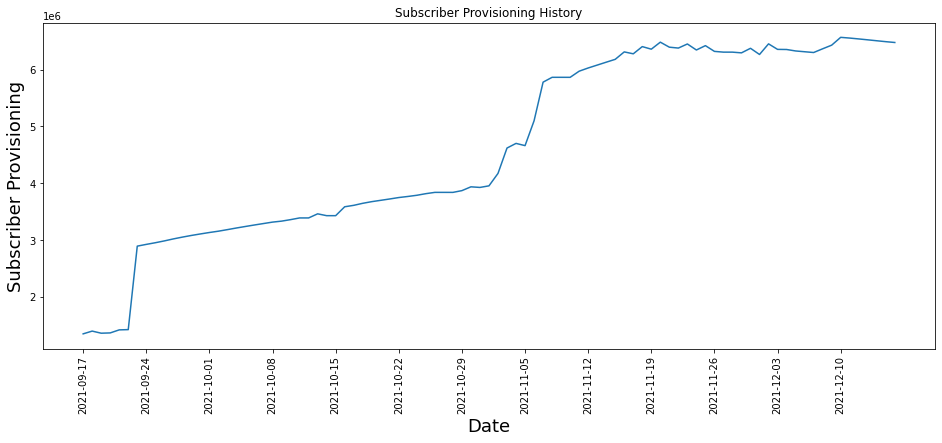

In [ ]:
# visualisasi data awal
plt.figure(figsize=(16,6))
plt.title('Subscriber Provisioning History')
plt.plot(subs_prov['DT_ID'], subs_prov['SUBS_PROVISIONING'])
plt.xticks(subs_prov['DT_ID'][week], rotation='vertical')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Subscriber Provisioning', fontsize=18)
plt.show()

In [ ]:
# memisahkan DataFrame untuk training
data = subs_prov.filter(['SUBS_PROVISIONING'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

73

In [ ]:
# scaling data dengan MinMaXScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.        ],
       [0.00928193],
       [0.00218619],
       [0.00314687],
       [0.01340769],
       [0.01426066],
       [0.29581287],
       [0.30172678],
       [0.30729556],
       [0.31342392],
       [0.32016935],
       [0.32624903],
       [0.33184636],
       [0.33693968],
       [0.34180151],
       [0.34624577],
       [0.35153456],
       [0.35701883],
       [0.3621616 ],
       [0.36719417],
       [0.37203147],
       [0.37684137],
       [0.38013101],
       [0.38517968],
       [0.39092572],
       [0.39092572],
       [0.40476402],
       [0.39856571],
       [0.39856571],
       [0.42857778],
       [0.43341642],
       [0.44025652],
       [0.44583833],
       [0.45034812],
       [0.45489681],
       [0.4597251 ],
       [0.46332711],
       [0.46733673],
       [0.47277826],
       [0.47714931],
       [0.47715027],
       [0.47709833],
       [0.48302509],
       [0.49586725],
       [0.49382632],
       [0.4991659 ],
       [0.54109069],
       [0.626

In [ ]:
# algoritma agar model mempelajari data sesuai keinginan range lookback nya
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

days = 30

for i in range(days, len(train_data)):
    x_train.append(train_data[i-days:i, 0])
    y_train.append(train_data[i, 0])
    if i <= days+1:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.        , 0.00928193, 0.00218619, 0.00314687, 0.01340769,
       0.01426066, 0.29581287, 0.30172678, 0.30729556, 0.31342392,
       0.32016935, 0.32624903, 0.33184636, 0.33693968, 0.34180151,
       0.34624577, 0.35153456, 0.35701883, 0.3621616 , 0.36719417,
       0.37203147, 0.37684137, 0.38013101, 0.38517968, 0.39092572,
       0.39092572, 0.40476402, 0.39856571, 0.39856571, 0.42857778])]
[0.43341642071664155]

[array([0.        , 0.00928193, 0.00218619, 0.00314687, 0.01340769,
       0.01426066, 0.29581287, 0.30172678, 0.30729556, 0.31342392,
       0.32016935, 0.32624903, 0.33184636, 0.33693968, 0.34180151,
       0.34624577, 0.35153456, 0.35701883, 0.3621616 , 0.36719417,
       0.37203147, 0.37684137, 0.38013101, 0.38517968, 0.39092572,
       0.39092572, 0.40476402, 0.39856571, 0.39856571, 0.42857778]), array([0.00928193, 0.00218619, 0.00314687, 0.01340769, 0.01426066,
       0.29581287, 0.30172678, 0.30729556, 0.31342392, 0.32016935,
       0.32624903, 0.33184636, 0.

In [ ]:
print(x_test)

[[[0.49586725]
  [0.49382632]
  [0.4991659 ]
  [0.54109069]
  [0.62667728]
  [0.64230354]
  [0.6347816 ]
  [0.71851621]
  [0.84884982]
  [0.86519128]
  [0.86519147]
  [0.86512306]
  [0.88584457]
  [0.89665423]
  [0.90641142]
  [0.91618318]
  [0.92580527]
  [0.95090645]
  [0.9444527 ]
  [0.96875992]
  [0.96008011]
  [0.98374133]
  [0.96682132]
  [0.96381933]
  [0.9776377 ]
  [0.95729678]
  [0.97202216]
  [0.95262965]
  [0.95010426]
  [0.95006517]]

 [[0.49382632]
  [0.4991659 ]
  [0.54109069]
  [0.62667728]
  [0.64230354]
  [0.6347816 ]
  [0.71851621]
  [0.84884982]
  [0.86519128]
  [0.86519147]
  [0.86512306]
  [0.88584457]
  [0.89665423]
  [0.90641142]
  [0.91618318]
  [0.92580527]
  [0.95090645]
  [0.9444527 ]
  [0.96875992]
  [0.96008011]
  [0.98374133]
  [0.96682132]
  [0.96381933]
  [0.9776377 ]
  [0.95729678]
  [0.97202216]
  [0.95262965]
  [0.95010426]
  [0.95006517]
  [0.94768159]]

 [[0.4991659 ]
  [0.54109069]
  [0.62667728]
  [0.64230354]
  [0.6347816 ]
  [0.71851621]
  [0.8

In [ ]:
# model Time Series Forecasting
timeseries_model = Sequential()
timeseries_model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
timeseries_model.add(LSTM(64, return_sequences=False))
timeseries_model.add(Dense(32))
timeseries_model.add(Dense(1))

In [ ]:
# compile model
timeseries_model.compile(optimizer='adam', loss='mae')

In [ ]:
# training model
timeseries_model.fit(x_train, y_train, batch_size=1, epochs=1)

43/43 [==============================] - 4s 20ms/step - loss: 0.1573


In [ ]:
 # mengecek akurasi model dengan data testing
test_data = scaled_data[training_data_len - days: , :]

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(days, len(test_data)):
    x_test.append(test_data[i-days:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
 
predictions = timeseries_model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# metrics penilaian yaitu dengan MAE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

522811.25713275926

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


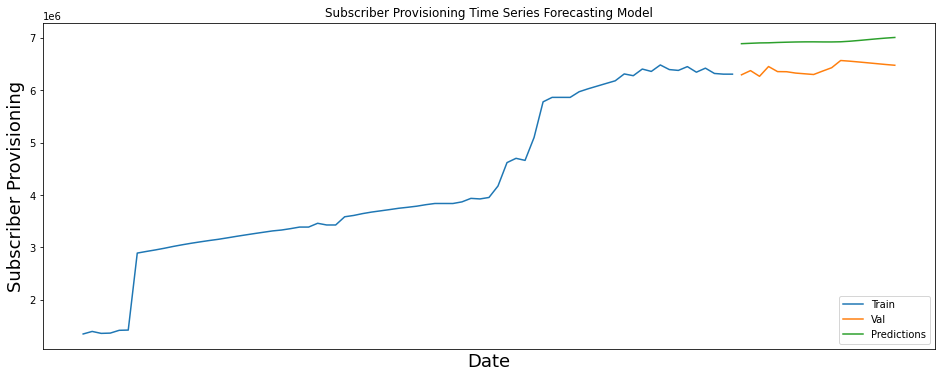

In [ ]:
# visualisasi hasil prediksi model Time Series Forecasting
plt.figure(figsize=(16,6))
plt.title('Subscriber Provisioning Time Series Forecasting Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Subscriber Provisioning', fontsize=18)
plt.xticks(subs_prov['DT_ID'][week], labels=subs_prov['DT_ID'][week], rotation='vertical')
plt.plot(train['SUBS_PROVISIONING'])
plt.plot(valid[['SUBS_PROVISIONING', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# hasil prediksi dari model Time Series Forecasting
valid

,SUBS_PROVISIONING,Predictions
73,6293314,6887487.5
74,6373522,6894779.5
75,6264668,6901800.0
76,6451581,6904226.5
77,6354526,6910702.5
78,6352399,6915589.0
79,6326633,6919631.5
80,6312863,6922000.0
81,6299198,6922392.0
82,6364760,6920742.0


## Model Robust Regression Subs Provisioning

In [ ]:
# mengecek data awal
subs_prov.head()

,DT_ID,SUBS_PROVISIONING
0,2021-09-17,1348121
1,2021-09-18,1396556
2,2021-09-19,1359529
3,2021-09-20,1364542
4,2021-09-21,1418085


In [ ]:
# membuat list week untuk label data tanggal
weekX = []

for i in range(len(subs_prov)):
  if i % 7 == 0:
    weekX.append(i)

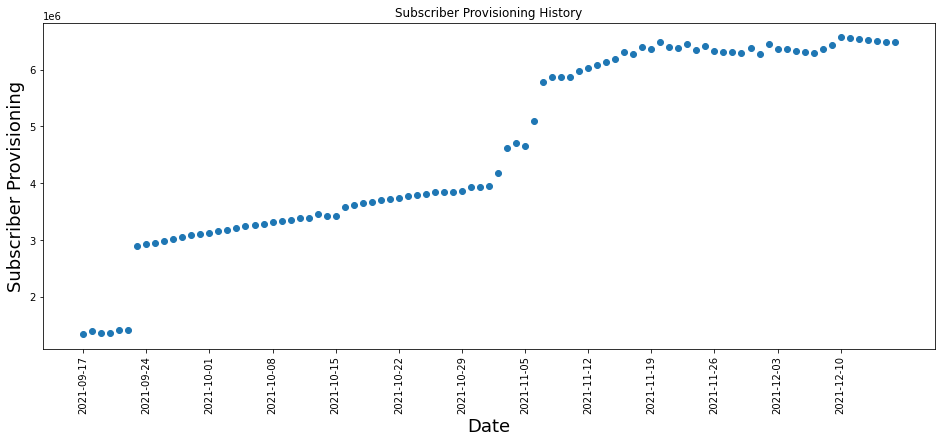

In [ ]:
# visualisasi data awal
plt.figure(figsize=(16,6))
plt.title('Subscriber Provisioning History')
plt.scatter(subs_prov['DT_ID'], subs_prov['SUBS_PROVISIONING'])
plt.xticks(subs_prov['DT_ID'][weekX], rotation='vertical')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Subscriber Provisioning', fontsize=18)
plt.show()

In [ ]:
# konversi tipe data datetime menjasi numerik
subs_prov['DT_ID2'] = subs_prov['DT_ID'].map(dt.datetime.toordinal)
subs_prov.head()

,DT_ID,SUBS_PROVISIONING,DT_ID2
0,2021-09-17,1348121,738050
1,2021-09-18,1396556,738051
2,2021-09-19,1359529,738052
3,2021-09-20,1364542,738053
4,2021-09-21,1418085,738054


In [ ]:
# mengurutkan kolom DataFrame
subs_prov = subs_prov[['DT_ID', 'DT_ID2', 'SUBS_PROVISIONING']]
subs_prov

,DT_ID,DT_ID2,SUBS_PROVISIONING
0,2021-09-17,738050,1348121
1,2021-09-18,738051,1396556
2,2021-09-19,738052,1359529
3,2021-09-20,738053,1364542
4,2021-09-21,738054,1418085
...,...,...,...
86,2021-12-12,738136,6538348
87,2021-12-13,738137,6522462
88,2021-12-14,738138,6506208
89,2021-12-15,738139,6490120


In [ ]:
subs_prov['DT_ID'] = subs_prov['DT_ID'].apply(lambda x: x.date())

In [ ]:
# prediksi menggunakan model Linear dan Robust Regression
X = np.array(subs_prov['DT_ID2']).reshape(-1,1)
y = np.array(subs_prov['SUBS_PROVISIONING'])

lr = linear_model.LinearRegression()
lr.fit(X, y)

qr = linear_model.QuantileRegressor()
qr.fit(X, y)

ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)

line_y_lr = lr.predict(X)
line_y_qr = qr.predict(X)
line_y_ransac = ransac.predict(X)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_quantile.py:277: ConvergenceWarning: Linear programming for QuantileRegressor did not succeed.
Status is 2: Problem appears to be infeasible.
Result message of linprog:
The algorithm terminated successfully and determined that the problem is infeasible.
  ConvergenceWarning,


In [ ]:
# mengecek nilai MAE model regresi
lr_mae = metrics.mean_absolute_error(subs_prov['SUBS_PROVISIONING'], line_y_lr)
qr_mae = metrics.mean_absolute_error(subs_prov['SUBS_PROVISIONING'], line_y_qr)
ransac_mae = metrics.mean_absolute_error(subs_prov['SUBS_PROVISIONING'], line_y_ransac)

print(lr_mae)
print(qr_mae)
print(ransac_mae)

415682.6515531435
544075.4750085348
415682.6515531435


In [ ]:
# mengecek nilai R-Squarred model regresi
lr_r2 = metrics.r2_score(subs_prov['SUBS_PROVISIONING'], line_y_lr)
qr_r2 = metrics.r2_score(subs_prov['SUBS_PROVISIONING'], line_y_qr)
ransac_r2 = metrics.r2_score(subs_prov['SUBS_PROVISIONING'], line_y_ransac)

print(lr_r2)
print(qr_r2)
print(ransac_r2)

0.9096012883242709
0.8336938499821647
0.9096012883242709


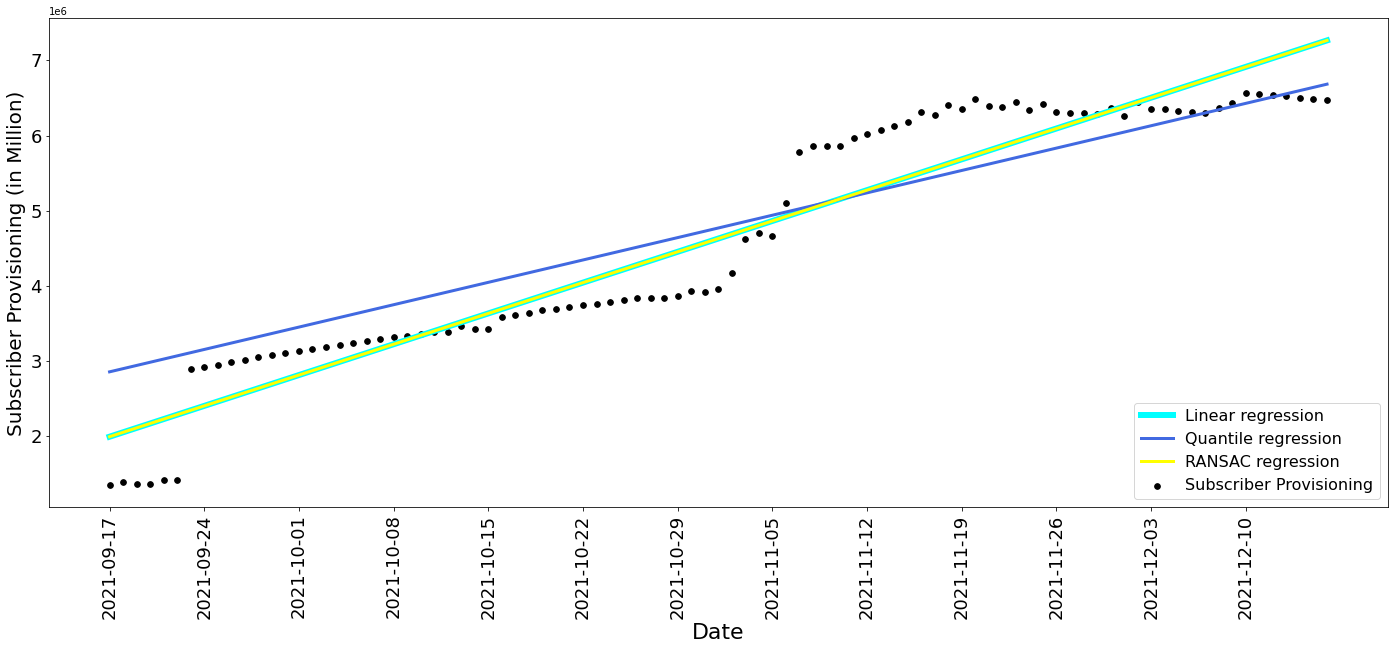

In [ ]:
# visualisasi data dengan garis regresi
plt.figure(figsize=(24, 9))
plt.scatter(X, y, color='black', marker='.', label='Subscriber Provisioning', s=128)
plt.plot(X, line_y_lr, color='aqua', linewidth=6, label='Linear regression')
plt.plot(X, line_y_qr, color='royalblue', linewidth=3, label='Quantile regression')
plt.plot(X, line_y_ransac, color='yellow', linewidth=3, label='RANSAC regression')
plt.legend(loc='lower right', fontsize=16)
plt.xticks(subs_prov['DT_ID2'][weekX], labels=subs_prov['DT_ID'][weekX], rotation='vertical', fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Date", fontsize=22)
plt.ylabel("Subscriber Provisioning (in Million)", fontsize=20)
plt.show()

Linear dan RANSAC Regression merupakan metode terbaik yang dapat digunakan dilihat dari perbandingan nilai MAE serta R-Squared dengan metode Quantile Regression

In [ ]:
# mengecek data terakhir
subs_prov.tail()

,DT_ID,DT_ID2,SUBS_PROVISIONING
86,2021-12-12,738136,6538348
87,2021-12-13,738137,6522462
88,2021-12-14,738138,6506208
89,2021-12-15,738139,6490120
90,2021-12-16,738140,6475627


In [ ]:
# membuat data berisi tanggal setelah tanggal data training
periods = 180

datelist = pd.date_range(dt.datetime(2021, 12, 17), periods=periods).date.tolist()
datelist

[datetime.date(2021, 12, 17),
 datetime.date(2021, 12, 18),
 datetime.date(2021, 12, 19),
 datetime.date(2021, 12, 20),
 datetime.date(2021, 12, 21),
 datetime.date(2021, 12, 22),
 datetime.date(2021, 12, 23),
 datetime.date(2021, 12, 24),
 datetime.date(2021, 12, 25),
 datetime.date(2021, 12, 26),
 datetime.date(2021, 12, 27),
 datetime.date(2021, 12, 28),
 datetime.date(2021, 12, 29),
 datetime.date(2021, 12, 30),
 datetime.date(2021, 12, 31),
 datetime.date(2022, 1, 1),
 datetime.date(2022, 1, 2),
 datetime.date(2022, 1, 3),
 datetime.date(2022, 1, 4),
 datetime.date(2022, 1, 5),
 datetime.date(2022, 1, 6),
 datetime.date(2022, 1, 7),
 datetime.date(2022, 1, 8),
 datetime.date(2022, 1, 9),
 datetime.date(2022, 1, 10),
 datetime.date(2022, 1, 11),
 datetime.date(2022, 1, 12),
 datetime.date(2022, 1, 13),
 datetime.date(2022, 1, 14),
 datetime.date(2022, 1, 15),
 datetime.date(2022, 1, 16),
 datetime.date(2022, 1, 17),
 datetime.date(2022, 1, 18),
 datetime.date(2022, 1, 19),
 datetim

In [ ]:
# membuat DataFrame tanggal yang akan diprediksi
date2022 = pd.DataFrame(datelist, columns=['DT_ID'])
date2022 = date2022.rename(columns={'0':'DT_ID'})
date2022.head()

,DT_ID
0,2021-12-17
1,2021-12-18
2,2021-12-19
3,2021-12-20
4,2021-12-21


In [ ]:
# konversi tipe data datetime menjadi numerik
date2022['DT_ID2'] = date2022['DT_ID'].map(dt.datetime.toordinal)
date2022.head()

,DT_ID,DT_ID2
0,2021-12-17,738141
1,2021-12-18,738142
2,2021-12-19,738143
3,2021-12-20,738144
4,2021-12-21,738145


In [ ]:
# menggabungkan DataFrame training dengan tanggal testing
dfX = subs_prov.append(date2022, sort=True).reset_index().drop('index', axis=1)
dfX

,DT_ID,DT_ID2,SUBS_PROVISIONING
0,2021-09-17,738050,1348121.0
1,2021-09-18,738051,1396556.0
2,2021-09-19,738052,1359529.0
3,2021-09-20,738053,1364542.0
4,2021-09-21,738054,1418085.0
...,...,...,...
266,2022-06-10,738316,NaN
267,2022-06-11,738317,NaN
268,2022-06-12,738318,NaN
269,2022-06-13,738319,NaN


In [ ]:
# membuat array berisi data yang akan diprediksi
x2022 = np.array(dfX['DT_ID2']).reshape(-1,1)
line_X2022 = np.arange(dfX['DT_ID2'].min(), dfX['DT_ID2'].max())[:, np.newaxis]

In [ ]:
# set metode prediksi
# method available : lr (Linear Regression), ransac (RANSAC Regression), qr (Quantile Regression)
method = qr
predicted = []

for i in line_X2022:
  ix = i.reshape(-1,1)
  predicted.append(float(method.predict(ix)))
  if predicted[-1] >= 8500000:
    break

In [ ]:
# memasukkan hasil prediksi kedalam list
intpredicted = []

for value in predicted:
  intpredicted.append(int(value))

In [ ]:
# menambahkan kolom hasil prediksi regresi kedalam DataFrame
result_df = dfX[:len(intpredicted)]
result_df['SUBS_PROVISIONING_PREDICTIONS'] = intpredicted
result_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,DT_ID,DT_ID2,SUBS_PROVISIONING,SUBS_PROVISIONING_PREDICTIONS
0,2021-09-17,738050,1348121.0,2856608
1,2021-09-18,738051,1396556.0,2899144
2,2021-09-19,738052,1359529.0,2941680
3,2021-09-20,738053,1364542.0,2984216
4,2021-09-21,738054,1418085.0,3026752
...,...,...,...,...
129,2022-01-24,738179,NaN,8343756
130,2022-01-25,738180,NaN,8386292
131,2022-01-26,738181,NaN,8428828
132,2022-01-27,738182,NaN,8471364


In [ ]:
# mengecek info DataFrame
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DT_ID                          134 non-null    object 
 1   DT_ID2                         134 non-null    int64  
 2   SUBS_PROVISIONING              91 non-null     float64
 3   SUBS_PROVISIONING_PREDICTIONS  134 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 4.3+ KB


In [ ]:
# membuat list week untuk label tanggal data
week2 = []

for i in range(len(result_df)):
  if i % 7 == 0:
    week2.append(i)

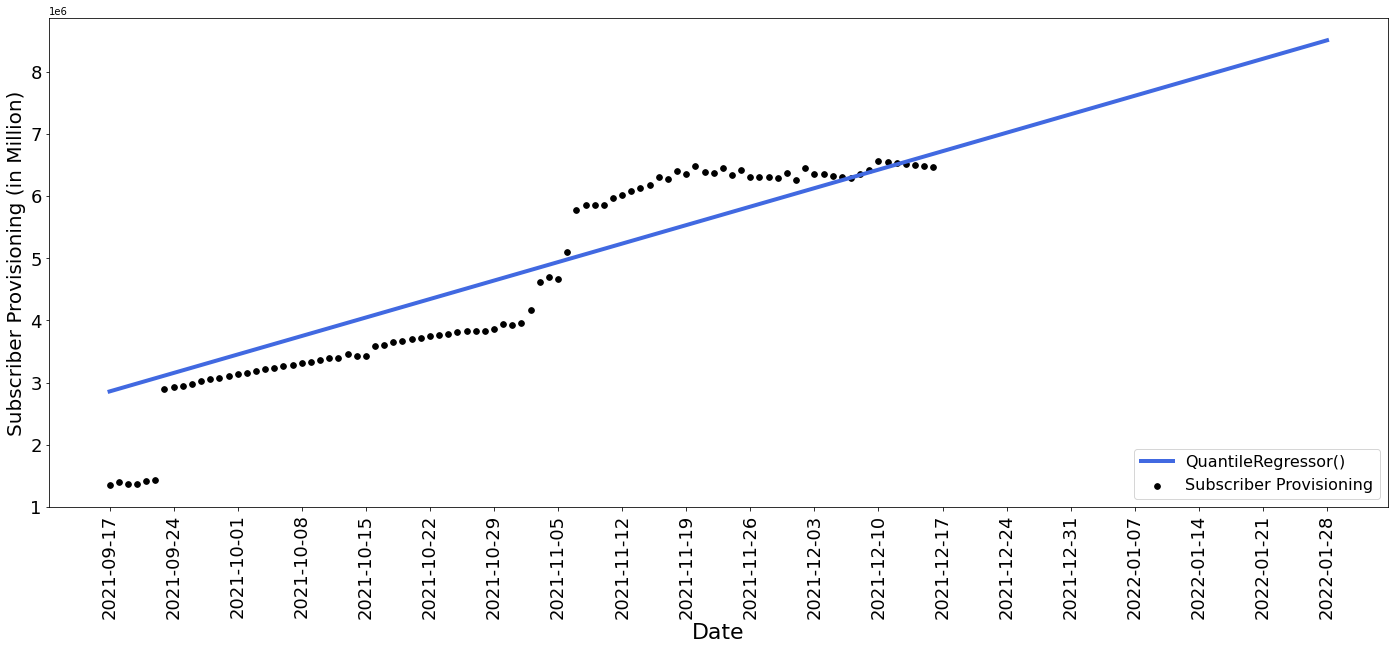

In [ ]:
# visualisasi data prediksi dengan machine learning
lw = 4
plt.figure(figsize=(24,9))
plt.scatter(X, y, color='black', marker='.', label='Subscriber Provisioning', s=128)
plt.plot(line_X2022[:len(result_df)], result_df['SUBS_PROVISIONING_PREDICTIONS'], color='royalblue', linewidth=lw, label='{}'.format(method))
plt.legend(loc='lower right', fontsize=16)
plt.xticks(result_df['DT_ID'][week2], labels=result_df['DT_ID'][week2], rotation='vertical', fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Date", fontsize=22)
plt.ylabel("Subscriber Provisioning (in Million)", fontsize=20)
plt.show()

## Model Linear Regression (Subs Prov to predict Subs Active)

In [ ]:
# membuang data yang tidak diperlukan dari DataFrame
X1 = df.drop(['DT_ID', 'SUBS_ACTIVE','ANSWER_TRAFFIC'],axis=1)
y1 = df['SUBS_ACTIVE']

In [ ]:
# membuat model awal
baseline_model1 = LinearRegression()
baseline_model1.fit(X1.values, y1)

LinearRegression()

In [ ]:
# mengecek koefisien dan intercept model
print(baseline_model1.intercept_)

print(baseline_model1.coef_)

366719.212531192
[0.31544291]


In [ ]:
# menguji model dengan data test
y1_pred = baseline_model1.predict(X1.values)

In [ ]:
y1_predint = []

for i in y1_pred:
  ix = i.reshape(-1,1)
  y1_predint.append(int(ix))

In [ ]:
# memasukkan hasil prediksi dan nilai sebenarnya kedalam DataFrame
report_model1 = pd.DataFrame({'Date': df['DT_ID'], 'Actual Active Subscriber': y1, 'Predicted Active Subscriber': y1_predint})
report_model1

,Date,Actual Active Subscriber,Predicted Active Subscriber
0,2021-09-17,1133166,791974
1,2021-09-18,1143681,807252
2,2021-09-19,1154237,795572
3,2021-09-20,1167460,797154
4,2021-09-21,1175126,814044
...,...,...,...
86,2021-12-12,2460714,2429194
87,2021-12-13,2454252,2424183
88,2021-12-14,2445332,2419056
89,2021-12-15,2437509,2413981


In [ ]:
report_model1['Date'] = pd.to_datetime(report_model1['Date']).dt.date
report_model1.head()

,Date,Actual Active Subscriber,Predicted Active Subscriber
0,2021-09-17,1133166,791974
1,2021-09-18,1143681,807252
2,2021-09-19,1154237,795572
3,2021-09-20,1167460,797154
4,2021-09-21,1175126,814044


In [ ]:
week1 = []

for i in range(len(report_model1)):
  if i % 7 == 0:
    week1.append(i)

report_model1week = report_model1.loc[report_model1.index.isin(week1)]
report_model1week

,Date,Actual Active Subscriber,Predicted Active Subscriber
0,2021-09-17,1133166,791974
7,2021-09-24,1198597,1288630
14,2021-10-01,1256207,1354594
21,2021-10-08,1338792,1412272
28,2021-10-15,1379855,1448031
35,2021-10-22,1500869,1548702
42,2021-10-29,1490423,1587055
49,2021-11-05,1824092,1836853
56,2021-11-12,2379173,2267907
63,2021-11-19,2465983,2372309


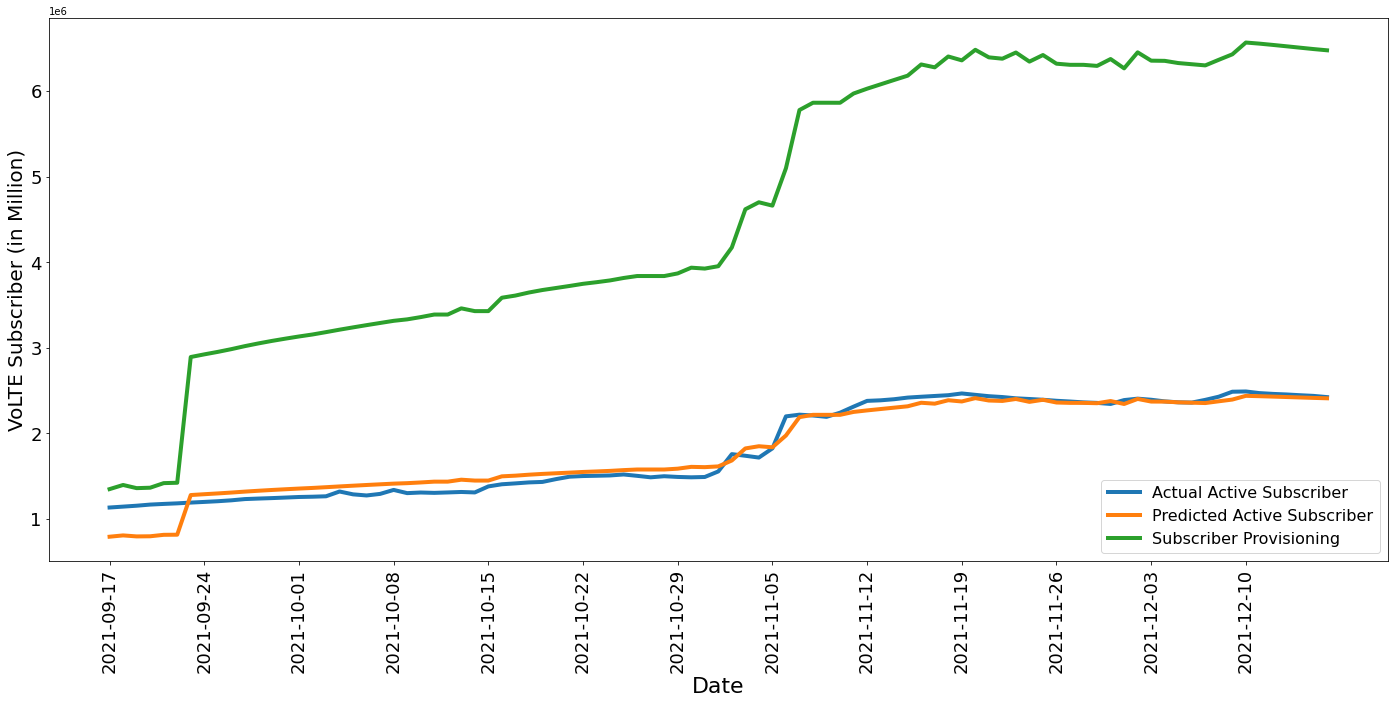

In [ ]:
# visualisasi data hasil prediksi dan nilai asli
plt.figure(figsize=(24,10))
plt.plot(report_model1['Date'], report_model1['Actual Active Subscriber'], linewidth=4, label='Actual Active Subscriber')
plt.plot(report_model1['Date'], report_model1['Predicted Active Subscriber'], linewidth=4, label='Predicted Active Subscriber')
plt.plot(df['DT_ID'], df['SUBS_PROVISIONING'], linewidth=4, label='Subscriber Provisioning')
plt.legend(loc='lower right', fontsize=16)
plt.xticks(report_model1['Date'][week1], labels=report_model1['Date'][week1], rotation='vertical', fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Date", fontsize=22)
plt.ylabel("VoLTE Subscriber (in Million)", fontsize=20)
plt.show()

In [ ]:
# mengecek nilai MAE model
print('Mean Absolute Error:', metrics.mean_absolute_error(y1, y1_pred))  

Mean Absolute Error: 87146.78878770402


In [ ]:
# mengecek apakah nilai MAE model sudah dibawah 10%
mae_model1 = round(metrics.mean_absolute_error(y1, y1_pred), 2)
scale_model1 = round((y1.values.max() - y1.values.min()) * (10 / 100), 2)

if mae_model1 < scale_model1:
  print("The MAE Score is " + str(mae_model1) + " which is smaller than " + str(scale_model1) + ". It is a Good Model!")
else:
  print("The MAE Score is " + str(mae_model1) + " which is greater than " + str(scale_model1) + ". Fix the model again!")

The MAE Score is 87146.79 which is smaller than 135589.8. It is a Good Model!


In [ ]:
# prediksi subscriber aktif dari total subscriber provisioning
subs_prov_total = pd.DataFrame([8500000])
pred_subs_prov_total = baseline_model1.predict(subs_prov_total.values)
print('Subscriber Active Prediction when Subscriber Provisioning reach 8500000: ', int(pred_subs_prov_total))

Subscriber Active Prediction when Subscriber Provisioning reach 8500000:  3047983


Nilai Subscriber Active yang telah diprediksi yaitu 3047983 akan digunakan untuk memprediksi kemungkinan jumlah traffic

## Model Linear Regression (Subs Active to predict Traffic)

In [ ]:
# membuang kolom yang tidak diperlukan
X2 = df.drop(['DT_ID', 'SUBS_PROVISIONING','ANSWER_TRAFFIC'],axis=1)
y2 = df['ANSWER_TRAFFIC']

In [ ]:
# membuat model awal
baseline_model2 = LinearRegression()
baseline_model2.fit(X2.values, y2)

LinearRegression()

In [ ]:
# mengecek koefisien dan intercept model
print(baseline_model2.intercept_)

print(baseline_model2.coef_)

3394.2123049311267
[0.03121126]


In [ ]:
# menguji model dengan data test
y2_pred = baseline_model2.predict(X2.values)

In [ ]:
# memasukkan hasil prediksi dan nilai asli kedalam DataFrame
report_model2 = pd.DataFrame({'Date': df['DT_ID'], 'Actual Traffic': y2, 'Predicted Traffic': y2_pred})
report_model2

,Date,Actual Traffic,Predicted Traffic
0,2021-09-17,39344.782415,38761.746330
1,2021-09-18,35982.878424,39089.932686
2,2021-09-19,36949.980219,39419.398704
3,2021-09-20,42717.753299,39832.105141
4,2021-09-21,42438.115448,40071.370629
...,...,...,...
86,2021-12-12,77750.035677,80196.186703
87,2021-12-13,85375.486690,79994.499568
88,2021-12-14,85402.002852,79716.095165
89,2021-12-15,85200.450647,79471.929510


In [ ]:
report_model2['Date'] = report_model2['Date'].apply(lambda x: x.date())

In [ ]:
week2 = []

for i in range(len(report_model2)):
  if i % 7 == 0:
    week2.append(i)

report_model2week = report_model2.loc[report_model2.index.isin(week2)]
report_model2week

,Date,Actual Traffic,Predicted Traffic
0,2021-09-17,39344.782415,38761.746330
7,2021-09-24,41635.336111,40803.930016
14,2021-10-01,43135.477820,42602.010470
21,2021-10-08,45234.405988,45179.592040
28,2021-10-15,46282.259664,46461.219842
35,2021-10-22,52317.181727,50238.218765
42,2021-10-29,52562.341613,49912.185986
49,2021-11-05,59087.441984,60326.414538
56,2021-11-12,76765.396350,77651.189685
63,2021-11-19,79452.024493,80360.638811


In [ ]:
report_model2week.to_csv('reportmodel2week.csv')

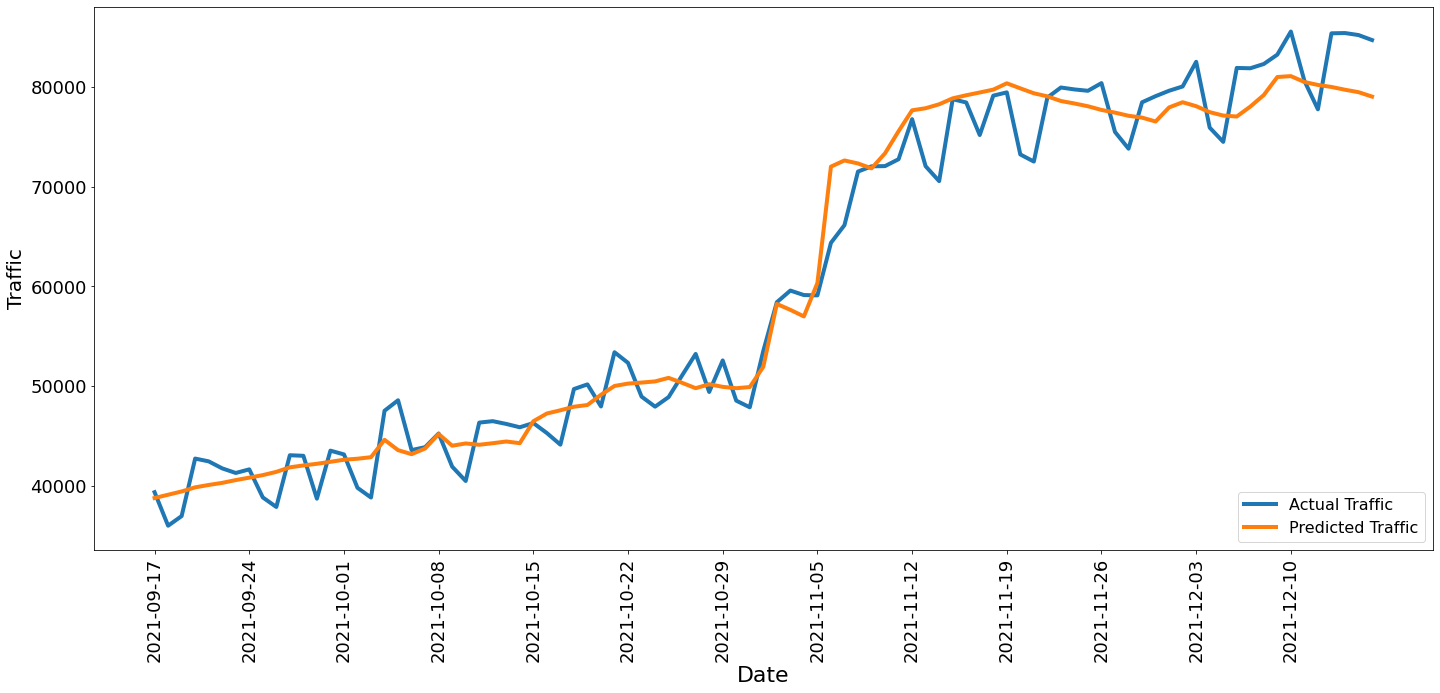

In [ ]:
# visualisasi data hasil prediksi dan nilai asli
plt.figure(figsize=(24,10))
plt.plot(report_model2['Date'], report_model2['Actual Traffic'], linewidth=4, label='Actual Traffic')
plt.plot(report_model2['Date'], report_model2['Predicted Traffic'], linewidth=4, label='Predicted Traffic')
plt.legend(loc='lower right', fontsize=16)
plt.xticks(report_model2['Date'][week2], labels=report_model2['Date'][week2], rotation='vertical', fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Date", fontsize=22)
plt.ylabel("Traffic", fontsize=20)
plt.show()

In [ ]:
# mengecek nilai MAE model
print('Mean Absolute Error:', metrics.mean_absolute_error(y2, y2_pred))  

Mean Absolute Error: 2441.6899942201544


In [ ]:
# mengecek apakah MAE model sudah dibawah 10%
mae_model2 = round(metrics.mean_absolute_error(y2, y2_pred), 2)
scale_model2 = round((y2.values.max() - y2.values.min()) * (10 / 100), 2)

if mae_model2 < scale_model2:
  print("The MAE Score is " + str(mae_model2) + " which is smaller than " + str(scale_model2) + ". It is a Good Model!")
else:
  print("The MAE Score is " + str(mae_model2) + " which is greater than " + str(scale_model2) + ". Fix the model again!")

The MAE Score is 2441.69 which is smaller than 4957.1. It is a Good Model!


In [ ]:
# prediksi jumlah traffic dari prediksi subscriber aktif
subs_active_total = pd.DataFrame([int(pred_subs_prov_total)])
pred_subs_active_total = baseline_model2.predict(subs_active_total.values)
print('Answer Traffic Prediction when Subscriber Provisioning reach 8500000: ', pred_subs_active_total)

Answer Traffic Prediction when Subscriber Provisioning reach 8500000:  [98525.589756]


Nilai Answer Traffic yang telah diprediksi yaitu 98525,589756 dengan MAE 2441.69